In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
delta_vals = [0.01,0.05,0.1,0.5,1.0,5.0,10.0]
lr_vals = [0.01,0.05,0.1,0.5,1.0,5.0,10.0]
Ms = [1,2,4,8,16,32,64,128,256]
R = 50
prefix="./rnd_results/T=5000_d=50_K=50/"

def get_best_params(alg, M,dvs=None):
    if alg=='linucb':
        lr1s=[0.10000]
        lr2s=[0.10000]
    elif alg=='greedy-ols':
        lr1s=[0]
        lr2s=[0]
    elif alg=='rnd-ols':
        lr1s=[0]
        lr2s=[0.1]
    elif alg=='greedy-sgd':
        lr1s=lr_vals
        lr2s=[0]
    else:
        lr1s=lr_vals
        lr2s=lr_vals
    if dvs == None:
        dvs = delta_vals
        
    best_params = None
    for e in dvs: 
        for lr1 in lr1s:
            for lr2 in lr2s:
                e = float("%0.3f" % (e))
                name = prefix+"%s_%d_%0.5f_%0.5f_%0.5f_regrets.out" % (alg, M, e, lr1, lr2)
                try: 
                    x = []; 
                    f = open(name).readlines()
                    for i in range(len(f)):
                        x.append([float(a) for a in f[i].split(" ")])
                    score = np.mean(x,axis=0)[-1]
                    # print('alg=%s delta=%0.3f lr1=%0.5f lr2=%0.5f score=%0.2f' % (alg, e, lr1, lr2, score))
                    if best_params is None or score < best_params[3]:
                        best_params = [e, lr1, lr2, score]
                except FileNotFoundError:
                    pass    
    return best_params

def read_results(fname):
    f = open(fname).readlines()
    lst = []
    for i in range(len(f)):
        lst.append([float(a) for a in f[i].split(" ")])
    return (lst)

In [69]:
best_lin = get_best_params('linucb', 1)
best_greedy_ols = get_best_params('greedy-ols', 1)
best_rnd_ols = get_best_params('rnd-ols', 32)
best_greedy_sgd = get_best_params('greedy-sgd', 1)
best_rnd_sgd = get_best_params('rnd-sgd', 32)
print(best_lin)
print(best_greedy_ols)
print(best_rnd_ols)
print(best_greedy_sgd)
print(best_rnd_sgd)

[0.1, 0.1, 0.1, 24.799999999999972]
[0.01, 0, 0, 2499.9999999999986]
[0.05, 0, 0.1, 37.81999999999991]
[1.0, 10.0, 0, 2350.229999999999]
[0.05, 1.0, 1.0, 110.6800000000004]


In [70]:
lin_res = []
grd_ols_res = []
rnd_ols_res = []
grd_sgd_res = []
rnd_sgd_res = []
name = prefix+"linucb_1_%0.5f_%0.5f_%0.5f_regrets.out" % (best_lin[0], best_lin[1], best_lin[2])
f = open(name).readlines()
for i in range(len(f)):
    lin_res.append([float(a) for a in f[i].split(" ")])

name = prefix+"greedy-ols_1_%0.5f_%0.5f_%0.5f_regrets.out" % (best_greedy_ols[0], best_greedy_ols[1], best_greedy_ols[2])
f = open(name).readlines()
for i in range(len(f)):
    grd_ols_res.append([float(a) for a in f[i].split(" ")])
    
name = prefix+"rnd-ols_32_%0.5f_%0.5f_%0.5f_regrets.out" % (best_rnd_ols[0], best_rnd_ols[1], best_rnd_ols[2])
f = open(name).readlines()
for i in range(len(f)):
    rnd_ols_res.append([float(a) for a in f[i].split(" ")])
    
name = prefix+"greedy-sgd_1_%0.5f_%0.5f_%0.5f_regrets.out" % (best_greedy_sgd[0], best_greedy_sgd[1], best_greedy_sgd[2])
f = open(name).readlines()
for i in range(len(f)):
    grd_sgd_res.append([float(a) for a in f[i].split(" ")])
    
name = prefix+"rnd-sgd_32_%0.5f_%0.5f_%0.5f_regrets.out" % (best_rnd_sgd[0], best_rnd_sgd[1], best_rnd_sgd[2])
f = open(name).readlines()
for i in range(len(f)):
    rnd_sgd_res.append([float(a) for a in f[i].split(" ")])

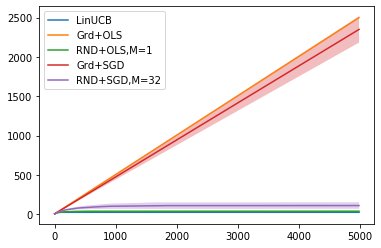

In [71]:
x = np.arange(1, 5001, 10)
for v in [lin_res, grd_ols_res, rnd_ols_res, grd_sgd_res, rnd_sgd_res]:
    plt.plot(x, np.mean(v,axis=0))
    plt.fill_between(x, np.mean(v,axis=0) - 2/np.sqrt(R)*np.std(v,axis=0), np.mean(v,axis=0)+2/np.sqrt(R)*np.std(v,axis=0), alpha=0.3)
                     
plt.legend(['LinUCB', 'Grd+OLS', 'RND+OLS,M=1', 'Grd+SGD', 'RND+SGD,M=32'], loc='upper left')

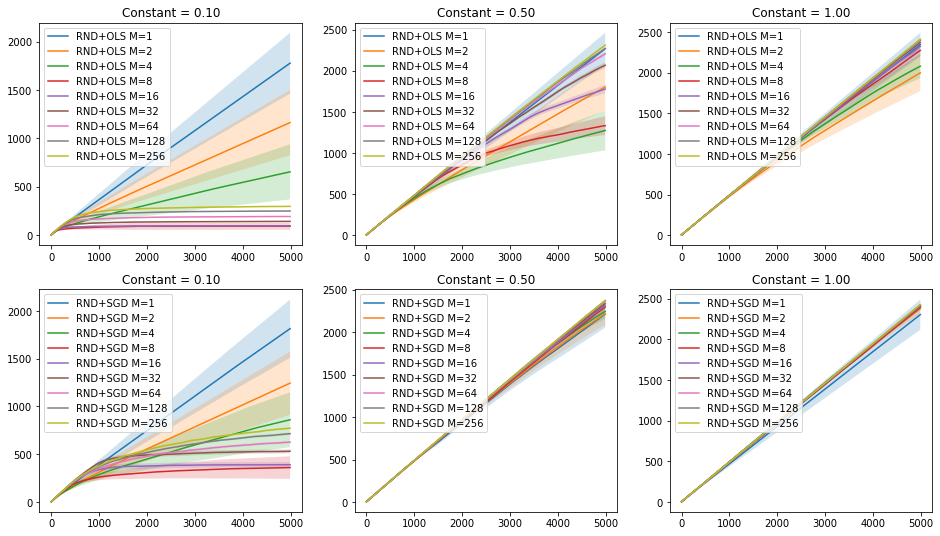

In [79]:
(fig, (axs1,axs2)) = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
x = np.arange(1, 5001, 10)
ds = [0.1,0.5,1.0]
for i in range(len(ds)):
    plt.sca(axs1[i])
    ax = plt.gca()
    for m in Ms:
        params = get_best_params('rnd-ols', m, dvs=[ds[i]])
        if params == None:
            print("M=%d, d=%0.2f" % (m,ds[i]))
        fname = prefix+'rnd-ols_%d_%0.5f_%0.5f_%0.5f_regrets.out' % (m, params[0], params[1], params[2])
        v = read_results(fname)
        # v = v/np.sqrt(np.log2(m+1))
        ax.plot(x, np.mean(v,axis=0))
        ax.fill_between(x, np.mean(v,axis=0) - 2/np.sqrt(R)*np.std(v,axis=0), np.mean(v,axis=0)+2/np.sqrt(R)*np.std(v,axis=0), alpha=0.2)
    ax.legend(['RND+OLS M=%d' % (m) for m in Ms])
    plt.title('Constant = %0.2f' % (ds[i]))
    
for i in range(len(ds)):
    plt.sca(axs2[i])
    ax = plt.gca()
    for m in Ms:
        params = get_best_params('rnd-sgd', m,dvs=[ds[i]])
        fname = prefix+'rnd-sgd_%d_%0.5f_%0.5f_%0.5f_regrets.out' % (m, params[0], params[1], params[2])
        v = read_results(fname)
        # v = v/np.sqrt(np.log2(m+1))
        ax.plot(x, np.mean(v,axis=0))
        ax.fill_between(x, np.mean(v,axis=0) - 2/np.sqrt(R)*np.std(v,axis=0), np.mean(v,axis=0)+2/np.sqrt(R)*np.std(v,axis=0), alpha=0.2)
    ax.legend(['RND+SGD M=%d' % (m) for m in Ms])
    plt.title('Constant = %0.2f' % (ds[i]))
    

1
[0.1, 0, 0.1, 1777.869999999998]
2
[0.1, 0, 0.1, 1164.2799999999997]
4
[0.1, 0, 0.1, 655.3499999999998]
8
[0.1, 0, 0.1, 93.39000000000014]
16
[0.1, 0, 0.1, 97.47000000000004]
32
[0.05, 0, 0.1, 37.81999999999991]
64
[0.05, 0, 0.1, 38.65999999999988]
128
[0.05, 0, 0.1, 43.26999999999999]
256
[0.05, 0, 0.1, 55.040000000000035]
1
[0.1, 0.5, 0.5, 1814.0099999999977]
2
[0.1, 1.0, 1.0, 1244.6599999999994]
4
[0.1, 1.0, 1.0, 861.3799999999991]
8
[0.1, 1.0, 1.0, 361.32999999999987]
16
[0.05, 10.0, 10.0, 260.6699999999998]
32
[0.05, 1.0, 1.0, 110.6800000000004]
64
[0.05, 1.0, 1.0, 114.72000000000004]
128
[0.05, 1.0, 1.0, 125.83]
256
[0.05, 1.0, 1.0, 158.37000000000003]


(0, 500)

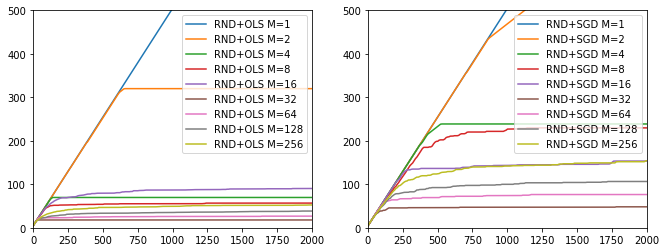

In [100]:
(fig,(ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(11,4))
plt.sca(ax1)
ax = plt.gca()
for m in Ms:
    params = get_best_params('rnd-ols', m)
    print(m)
    print(params)
    if params == None:
        print("M=%d, d=%0.2f" % (m,ds[i]))
    fname = prefix+'rnd-ols_%d_%0.5f_%0.5f_%0.5f_regrets.out' % (m, params[0], params[1], params[2])
    v = read_results(fname)
    # v = v/np.sqrt(np.log2(m+1))
    ax.plot(x, np.median(v,axis=0))
    #ax.fill_between(x, np.mean(v,axis=0) - 2/np.sqrt(R)*np.std(v,axis=0), np.mean(v,axis=0)+2/np.sqrt(R)*np.std(v,axis=0), alpha=0.2)
ax.legend(['RND+OLS M=%d' % (m) for m in Ms])
ax.set_xlim([0,2000])
ax.set_ylim([0,500])

plt.sca(ax2)
ax = plt.gca()
for m in Ms:
    params = get_best_params('rnd-sgd', m)
    print(m)
    print(params)
    if params == None:
        print("M=%d, d=%0.2f" % (m,ds[i]))
    fname = prefix+'rnd-sgd_%d_%0.5f_%0.5f_%0.5f_regrets.out' % (m, params[0], params[1], params[2])
    v = read_results(fname)
    # v = v/np.sqrt(np.log2(m+1))
    ax.plot(x, np.median(v,axis=0))
    # ax.fill_between(x, np.mean(v,axis=0) - 2/np.sqrt(R)*np.std(v,axis=0), np.mean(v,axis=0)+2/np.sqrt(R)*np.std(v,axis=0), alpha=0.2)
ax.legend(['RND+SGD M=%d' % (m) for m in Ms])
ax.set_xlim([0,2000])
ax.set_ylim([0,500])

(array([32.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([  12. ,  136.4,  260.8,  385.2,  509.6,  634. ,  758.4,  882.8,
        1007.2, 1131.6, 1256. , 1380.4, 1504.8, 1629.2, 1753.6, 1878. ,
        2002.4, 2126.8, 2251.2, 2375.6, 2500. ]),
 <a list of 20 Patch objects>)

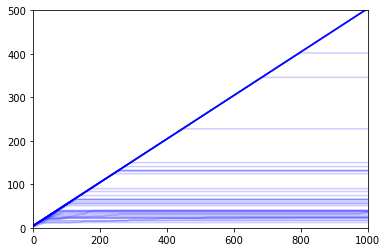

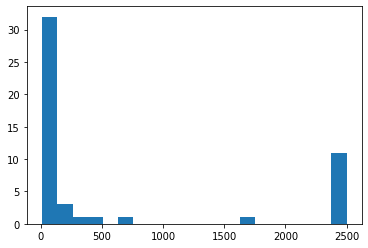

In [110]:
params = [0.1, 0, 0.1, 655.3499999999998]
m=4
fname = prefix+'rnd-ols_%d_%0.5f_%0.5f_%0.5f_regrets.out' % (m, params[0], params[1], params[2])
v = read_results(fname)
for i in range(R):
    plt.plot(x, v[i],color='blue',alpha=0.2)
plt.xlim([0,1000])
plt.ylim([0,500])
f = plt.figure()
plt.hist([v[i][-1] for i in range(50)], bins=20)

In [29]:
np.sqrt(1 - 2/np.pi)

0.6028102749890869

In [14]:
np.logspace(-1,1,3)

array([ 0.1,  1. , 10. ])

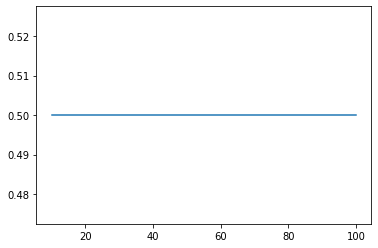

In [66]:
d = 100
out = []
for d in range(10,101,10):
    arr = []
    for _ in range(100):
        # weights = np.matrix(np.random.dirichlet(d*np.ones(d))).T
        # weights = weights/np.linalg.norm(weights)
        weights = np.matrix(0.25*np.ones(d)).T
        idx = np.random.choice(d)
        weights[idx] += 0.5
        arr.append(np.max(weights) - np.min(weights))
    out.append(np.mean(arr))
plt.plot(range(10,101,10), out)